### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the final section of this lesson.


In [71]:
import os
p=os.getcwd()
print(p)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
from scipy.stats import ttest_rel
from scipy.stats import t
import pandas as pd
df=pd.read_csv(p+'/stroopdata.csv')
df

/home/workspace


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


### Questions For Investigation :

(1) What is the independent variable? What is the dependent variable?

Dependent variable: The time it takes to name the ink colors in equally-sized lists in our Stroop task.
Independent variable:Words condition- Congruent and Incongruent 

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Null Hypothesis(Ho):There is no significant difference in the color recognition time for both congruent and incongruent word condition.
Ho :( μc - μi = 0 )
Aletrnative Hypothesis(Ha):There is a significant difference in the color recognition time for both congruent and incongruent word conditions.
Ha : ( μc - μi ≠ 0 )
Where,
μ :the population mean 
μc:population mean from which congruent word test sample is derived
μi:population mean from which incongruent word test sample is derived

Statistical test proposed :Two tailed dependent sample t-test.
I am performing this test because here we are comparing the time to name an ink color of a sample from same population in two different conditions(congruent and incongruent word condition) and based on this result we come to a conclusion about the population.
Since none of the population parameters is available we cannot consider the z test.


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [72]:
# Perform the analysis here
#As a measure of central tendancy I will be finding the mean.
#As as a measure of variability I will be finding the standard deviation
c=df['Congruent']
i=df['Incongruent']
def descriptive_stats(column, heading, unit):
    mean = np.mean(column)
    median = np.median(column)
    std = np.std(column, ddof=1)
    print(heading)
    print('Mean(' + unit + ')\t', 'Median(' + unit + ')\t', 'Std(' + unit + ')')
    print(mean, '\t', median, '\t', std)

print()
descriptive_stats(c, 'Congruent', 'time')
print()
descriptive_stats(i, 'Incongruent', 'time')



Congruent
Mean(time)	 Median(time)	 Std(time)
14.051125 	 14.3565 	 3.55935795765

Incongruent
Mean(time)	 Median(time)	 Std(time)
22.0159166667 	 21.0175 	 4.79705712247


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

The two visualizations I'm using to show the distribution of the sample data are:
1.Histogram
2.Boxplot

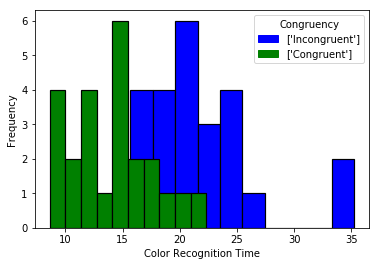

In [73]:
##1.To plot a Histogram
cong = np.asarray(c)
incong = np.asarray(i)
    
plt.figure()
plt.xlabel('Color Recognition Time')
plt.ylabel('Frequency')
    
plt.hist(incong, color='blue',edgecolor='black', linewidth=1.2)
plt.hist(cong, color='green', edgecolor='black', linewidth=1.2)

blue_patch = mpatches.Patch(color='blue', label=['Incongruent'])
green_patch = mpatches.Patch(color='green', label=['Congruent'])
plt.legend(title='Congruency', handles=[blue_patch, green_patch])
plt.show()
    

When we look at the plot we see that the histogram of congruent condition is to the left of histogram of incongruent condition.There is a significant difference in the mean and median of the two samples of data.

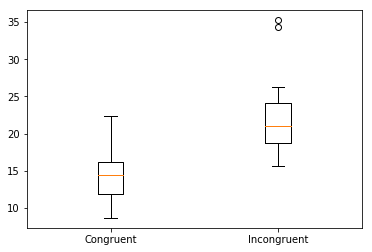

In [74]:
#2.To plot a box plot
fig = plt.figure(0)
ax = fig.add_subplot(111)
bp = ax.boxplot([cong, incong,])
ax.set_xticklabels(['Congruent', 'Incongruent'])
plt.show()


When we look at the box plot we see that there is a longer range of time difference in the incongruent test condition compared to the congruent.Outliers are present in the incongruent words sample.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

We perform the two tailed dependent sample t-test at α=0.05

In [89]:
mean_diff = np.mean(cong) - np.mean(incong)
s_e_m =np.sqrt(np.std(cong, ddof=1)+np.std(incong, ddof=1))
d_f = cong.shape[0] - 1
t_critical = t.isf([0.025], [[d_f]])[0][0]
m_o_e = t_critical * s_e_m

print(' t-critical value: ', t_critical)
print(' Mean Difference: ', mean_diff)
print(' Standar Error = %6.3f,Degrees of Freedom = %d' % (s_e_m, d_f))
print(' t-statistic = %6.3f,p-value = %f' % ttest_rel(cong, incong))
print(' CI: (%6.4f, %6.4f)' % (mean_diff - m_o_e, mean_diff + m_o_e))


 t-critical value:  2.06865761042
 Mean Difference:  -7.96479166667
 Standar Error =  2.891,Degrees of Freedom = 23
 t-statistic = -8.021,p-value = 0.000000
 CI: (-13.9448, -1.9848)


t(23)=-8.021, p-value=0.00, two tailed test
t-critical value is ±2.069
Confidence Interval is (-13.9448, -1.9848)


Here we performed a two tailed test at α=0.05.So on each side of the distribution we have 0.025.Here the p-value is much less than .025.hence we REJECT the null hypothesis.And thus we go with the alternative hypothesis and conclude that there is a significant difference in the color recognition time of congruent and incongruent words.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I think that the reasons for the effects observed are because our brain is not uses to such a task. The color names of the words are always processed very quickly, regardless of the color of the ink. On the other hand, identifying colors is not a task that we have to report on very often and, because it is not automatized, it is slower. The fast and automatic processing of the color name of the word interferes with the reporting of the ink color.

Similar test can be performed in areas like:
1.Jumbled letters.
It doesn't matter in what order the letters in a word are, the only important thing is that the first and last letter be at the right place. The rest can be a total mess and you can still read it without problem. This is because the human mind does not read every letter by itself but the word as a whole.Here we can compare the word recognition time of jumbled and non-jumbles words to arrive at a conclusion.
2.To find the odd one outs in a group of patterns,words,numbers etc based on the recognition time.